
# Otimização: Gradiente Estocástico (Método: Centróide)

*Descrição da Tarefa:* 

Escolha x_0 ∈ Rn; Defina k ← 0; Repita até que um critério de parada seja satisfeito: Gere yk sendo realizações da variável aleatória y; Compute um vetor estocástico g(xk, yk); Defina xk+1 ← xk − αk g(xk, yk) para algum αk > 0; k ← k + 1;

Utiliza-se uma modificação do SGD (Stochastic Gradient Descent) para reduzir a variância do método. Em particular, utiliza-se a técnica de redução de variância baseada em centróides.


**Derivada Calculada:**

$\triangledown{f}=\left\langle{}\dfrac{\partial{}f}{\partial{}w},\dfrac{\partial{}f}{\partial{}b}\right\rangle$ = $\left\langle{}-2y_{i}x_{i}\max(0,(1-y_{i}(w^{T}x_{i}-b))+2\rho{}w),2y_{i}\max(0,(1-y_{i}(w^{T}x_{i}-b)))\right\rangle$ 

Foi escolhida a reta geradora $y = 2x + 10$

### Funções Auxiliares

In [1]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

generate_line = lambda x: 2*x + 10

def generate_dots(n, y, border = 0.15):
    ans = []
    for _ in range(n):
        a = random.uniform(0,5)
        ans.append([a, generate_line(a)*(1.0+y*border+y*random.random()), y])
        
    return ans

## **Gerar os pontos:**

Serão gerados 400 pontos aleatórios (200 up, 200 down)

In [2]:
n = 200
up = generate_dots(n, 1) # a cima da reta
down = generate_dots(n, -1) # abaixo da reta
dots = up.copy()
dots.extend(down)
dots = np.array(dots)

up = np.array(up)
down = np.array(down)

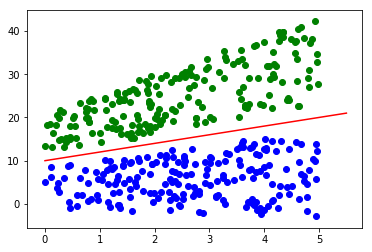

In [3]:
x = np.arange(0, 6, 0.5)
plt.plot(x, generate_line(x), c = "red")
plt.scatter(up[:,0], up[:,1], c='green')
plt.scatter(down[:,0], down[:,1], c = 'blue')

## SGD (Implementação):

Funções Auxiliares:

In [4]:
lipschitz = lambda x, rho: 2*rho + (LA.norm(x, axis = 1)**2).sum()/x.shape[0]
gen_line = lambda w,b,x: x*(-w[0]/w[1]) + b/w[1]
get_line_string = lambda w,b: "y = {:.2f}x + {:.2f}".format((-w[0]/w[1])[0], (b/w[1])[0])

def plot_g(x, y, w, b, title=""):
    x_ = np.arange(0, 6, 0.5)
    plt.plot(x_, gen_line(w,b,x_), c = "blue")
    plt.scatter(x[:,0], x[:,1], c = y)
    plt.title(title)
    
def get_grad(x, y, w, b, n):
    grads = []
    
    for i in n:
        temp = (1-y[i]*(w.T.dot(x[i,0:2])-b)[0])
        grads.append([-x[i,0]*2*y[i]*max(0,temp), -x[i,1]*2*y[i]*max(0,temp), 2*y[i]*max(0,temp)])
    
    return np.array(grads).sum(axis=0)/200

**Implementação do Gradiente Estocástico com Redução de Variância:**

Na nossa implementação, escolhemos 30 amostras aleatórias para realizar o cálculo do gradiente.

In [5]:
from collections import deque

def sgd_centroid(x, y, w, b, it = 500, rho = 0.05, r = 3):
    
    x_list = deque(maxlen=r-1)
    n_amostra = 30
    alpha = 1/lipschitz(x, rho)
    
    for _ in range(it):
        x_list.append((w,b))
        amostras = [random.randint(0, x.shape[0]-1) for _ in range(n_amostra)]
        grad = get_grad(x, y, w, b, amostras)
        z_w = (w.T-alpha*(grad[0:2]+2*rho*w.T)).T
        z_b = b - alpha*(grad[2])
        
        if len(x_list) > 0:
            p_val = 1/(len(x_list)+1)
        else:
            p_val = 1
        
        sum_w, sum_b = 0, 0
        for tupla in x_list:
            sum_w += tupla[0]*p_val
            sum_b += tupla[1]*p_val
            
        w = p_val*z_w + sum_w
        b = p_val*z_b + sum_b
                
    return w, b

## Experimentos

Definindo a reta de chute inicial:

Reta Inicial
y = -0.17x + 0.50


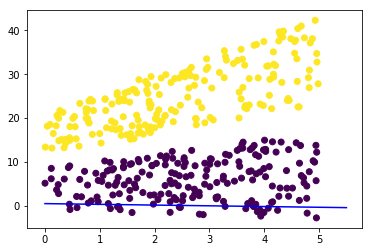

In [6]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[1, 6]]).T
b = 3

print("Reta Inicial")
print(get_line_string(w,b))
plot_g(x,y,w,b)

### Caso 1: r = 2, variado iterações

y = 3.27x + 1.96


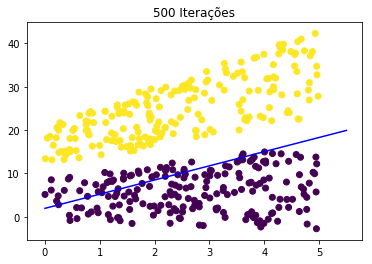

In [7]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3

w, b = sgd_centroid(x,y,w,b, 500, 0.1, r = 2)
print(get_line_string(w,b))
plot_g(x,y,w,b, title='500 Iterações')

y = 4.51x + 4.16


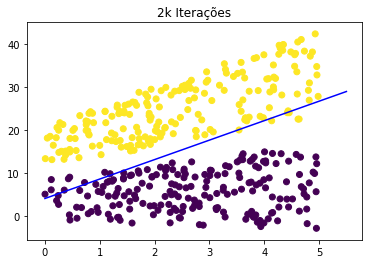

In [8]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3

w, b = sgd_centroid(x,y,w,b, 2000, 0.1, r = 2)
print(get_line_string(w,b))
plot_g(x,y,w,b, title='2k Iterações')

y = 1.92x + 12.27


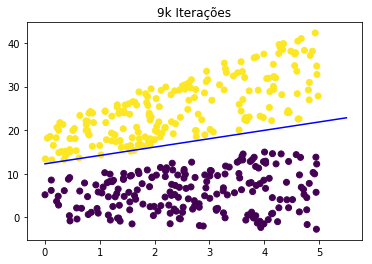

In [9]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3

w, b = sgd_centroid(x,y,w,b, 9000, 0.1, r = 2)
print(get_line_string(w,b))
plot_g(x,y,w,b, title='9k Iterações')

### Caso 2: r = 4, variado iterações

y = 3.52x + 2.16


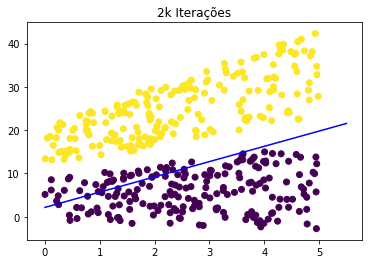

In [10]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3

w, b = sgd_centroid(x,y,w,b, 2000, 0.1, r = 4)
print(get_line_string(w,b))
plot_g(x,y,w,b, title='2k Iterações')

y = 3.80x + 6.51


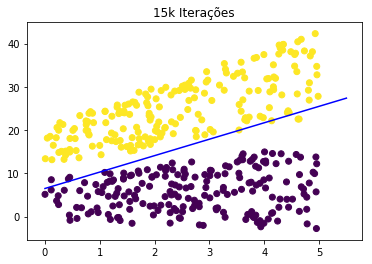

In [11]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3

w, b = sgd_centroid(x,y,w,b, 15000, 0.1, r = 4)
print(get_line_string(w,b))
plot_g(x,y,w,b, title='15k Iterações')

y = 2.09x + 11.96


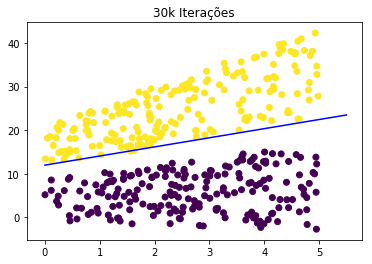

In [12]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3

w, b = sgd_centroid(x,y,w,b, 30000, 0.1, r = 4)
print(get_line_string(w,b))
plot_g(x,y,w,b, title='30k Iterações')

## Conclusão

*(Escreva de maneira clara e objetiva o que foi observado sobre uma comparação sobre o desempenho do método contra o da aula passada..)*

Podemos observar que este método com redução de variância *por centróides* é uma melhoria em relação ao método tradicional. A ideia é escolher gradientes melhores de tal forma que haja uma redução na variância ao longo das iterações. Em particular, esta técnica apresenta melhorias na tarefa de classificação e regressão convexas, mas não tanto quanto o SVRG

Nos nossos experimentos, observamos que a modificação dos hiperparâmetros afetam o tempo de convergência. Especificamente, há indícios de que ao utilizar valores mais altos de *r*, acabamos necessitando de mais iterações para convergir. Todavia, tal fenômeno também poderia ser amenizado se substituíssemos a distribuição utilizada para definir *p* (foi utilizada uma distribuição uniforme).

Por fim, conclui-se que este método é adequado para o problema em questão, uma vez que satisfez a condição de encontrar uma reta que separe bem os pontos adequadamente.